1.\


a.
$$\frac{\partial s}{\partial \theta} = (-sin\theta cos\phi, cos\theta cos\phi, 0)$$
$$\frac{\partial s}{\partial \phi} = (-cos\theta sin\phi, -sin\theta sin\phi, cos\phi)$$

b.
$$ g_{ij} = \begin{bmatrix}
<\frac{\partial s}{\partial \theta},\frac{\partial s}{\partial \theta}> & <\frac{\partial s}{\partial \phi},\frac{\partial s}{\partial \theta}> \\
<\frac{\partial s}{\partial \theta},\frac{\partial s}{\partial \phi}> & <\frac{\partial s}{\partial \phi},\frac{\partial s}{\partial \phi}>
\end{bmatrix}$$

$$ g_{ij} = \begin{bmatrix}
  cos^2\phi & 0   \\
  0 & 1
\end{bmatrix}$$

c.
$$ g^{ij} = \begin{bmatrix}
 \frac{1}{cos^2\phi} & 0   \\
  0 & 1
\end{bmatrix}$$

d.
$$\Gamma _{bc}^{a} = \frac{1}{2}\Sigma^{\theta\phi}_{d} g^{ad}( g_{bd,c} + g_{cd,b} - g_{bc,d})$$
By symmetry
$$ \Gamma _{bc}^{a} = \Gamma _{cb}^{a}$$
In this case all a,b,c,d are either $\theta$ or $\phi$.\\
As $\theta$ and $\phi$ are orthogonal according to $g_{ab}$ because $(g_{\theta \phi}=g_{\phi \theta} = g^{\theta \phi}=g^{\phi \theta} =0)$
$$\Gamma _{bc}^{b} = \frac{1}{2}g^{bb}g_{bb,c} $$
Therefore,
$$\Gamma _{\phi \phi}^{\phi} = \Gamma _{\phi \theta}^{\phi} = \Gamma _{\theta \phi}^{\phi} =  \Gamma _{\phi \phi}^{\theta} = \Gamma _{\theta \theta}^{\theta} = 0 $$
And
$$\Gamma _{\theta \phi}^{\theta} = \Gamma _{\phi \theta}^{\theta} = -\frac{sin\phi}{cos\phi}$$
$$\Gamma _{\theta \theta}^{\phi} = sin\phi cos\phi$$


e.
For the equator $\phi = 0$, when that happens,
$$\Gamma _{\theta \phi}^{\theta} = \Gamma _{\phi \theta}^{\theta} = \Gamma _{\theta \theta}^{\phi} = 0$$
As for the equator all the Christoffel Symbols becomes zero, equator of a sphere is a geodesic.

f.
Above work proves that geodesic of two points in equator is the line along the equator. By the rotational symmetry, the geodesic between any two points on the sphere should be the great circle parsing through those points. Therefore great circles are geodesics.

2.\

In [71]:
import numpy as np
from math import cos,sin,acos
import matplotlib.pyplot as plt

In [72]:
#Function to project an object to pre-shape sphere
def recheck(s):
    s = np.array(s)
    s = s-np.mean(s,axis=0)
    s = s/np.linalg.norm(s)
    return s


In [73]:
# Function to Orthogonal Procrustes Analysis. Target shape is y and moving shape is x
def opa(x,y):
    n = len(x)
    m = len(y)
    a_T = x
    a = np.transpose(a_T)
    b_T = y
    b = np.transpose(b_T)
    X = np.matmul(b,a_T)


    U, Sigma, V = np.linalg.svd(X, full_matrices=False)
    sample = np.matmul(np.matmul(U, Sigma),V)
    inter = np.matmul(U, V)
    R_A = np.matmul( inter, a)
    return np.transpose(R_A)

In [74]:
#Function for exponential map
def expMap(origin, tangent):
    tangVal = np.linalg.norm(tangent)
    dest = origin*cos(tangVal) + (tangent/tangVal)* sin(tangVal)
    return dest


In [75]:
#Function for log map
def logMap(x, y):
    n = len(x)
    m = len(y)
    y = opa(y,x)
    a = x.reshape(1,2*n)
    b = y.reshape(1,2*m)
    cos_v = np.inner(a,b)[0][0]
    cos_v = min(max(-1,cos_v),1)
    v_mag   = acos(cos_v)

    if(v_mag != 0):
        v_dir = (b - a*cos_v)/sin(v_mag)
    else:
        v_dir = a
    tangent = v_dir*v_mag
    return tangent.reshape(n,2)

In [76]:
#Following set of code create the set of triangles and add a gaussian noise to the co-ordinates
s = np.random.normal(1,0.5,100)
triangles = []
for i in s:
    z = np.random.normal(0,0.1,6)
    obj = [[-1+z[0],0+z[1]],[1+z[2],0+z[3]],[0+z[4],i+z[5]]]
    triangles.append(obj)

#Following set of code import the corpus dataset
corpus = []
for x in range(32):
    dataPoint = []
    if x< 10:
        num = '0'+ str(x)
    else:
        num = str(x)
    with open('./cc-shapes/cc.'+ num + '.lpts') as f:
        lines = f.read()
        newSplit = lines.split('\n')
        for line in newSplit:
            xyPairs = line.split(' ')
            if(len(xyPairs)<2):
                continue
            dataPoint.append(list(map(float,xyPairs)))
    corpus.append(dataPoint)

#Following code maps the shapes to pre-shape sphere
triangles = list(map(recheck,triangles))
corpus = list(map(recheck,corpus))

In [77]:
#Following function creates the sequence of objects deforming from one to other, for a given dataSet, start and end
def createTransform(dataSet, origin, end):
    transform = [dataSet[origin]]
    lastPoint = opa( dataSet[end], transform[0],)
    vector = logMap(transform[0], dataSet[end])
    for i in range(1,10):
        transform.append(expMap(transform[0],vector*0.1*i))
    transform.append(lastPoint)
    return transform

In [78]:
#Following function plot the objects on the geodesic
def plotGeodesic(transform):
    for item in transform:
        plt.figure()
        coord = list(item)
        coord.append(coord[0])
        xs, ys = zip(*coord)
        plt.plot(xs,ys)
        plt.show()
    plt.figure()
    for item in transform:
        coord = list(item)
        coord.append(coord[0])
        xs, ys = zip(*coord)
        plt.plot(xs,ys)
    plt.show()
    return

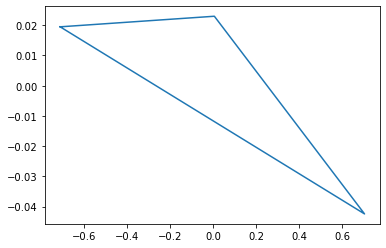

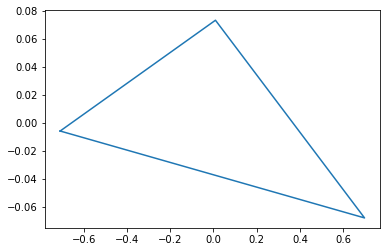

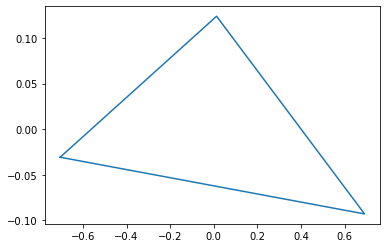

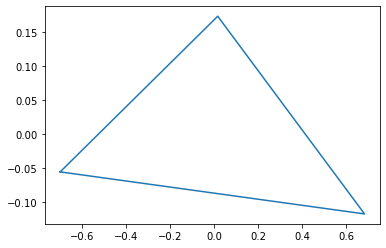

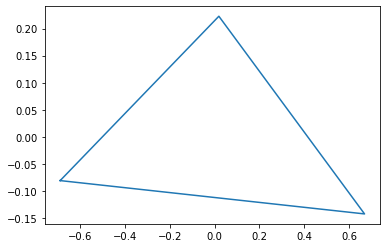

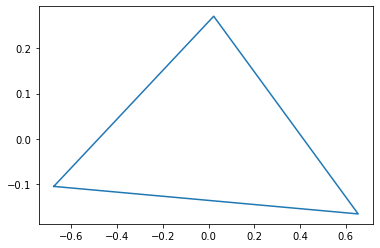

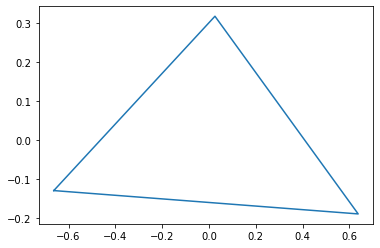

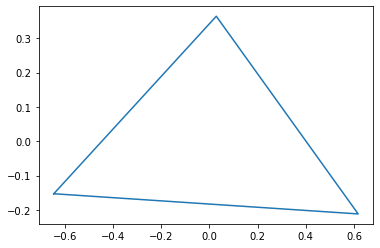

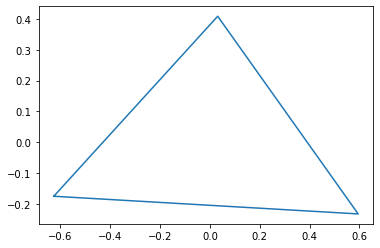

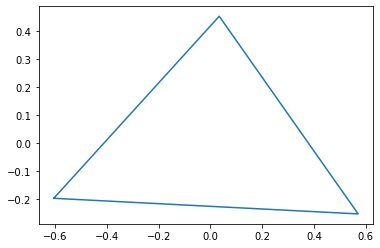

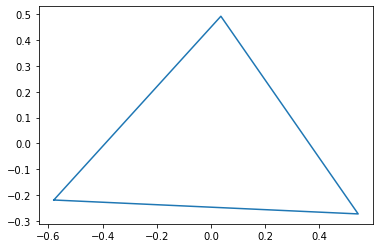

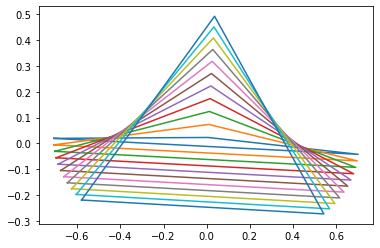

In [79]:
#Geodesic transformation for triangles
plotGeodesic(createTransform(triangles,30,50))

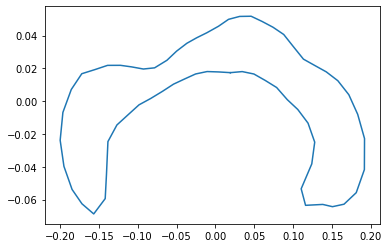

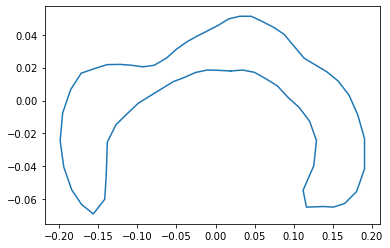

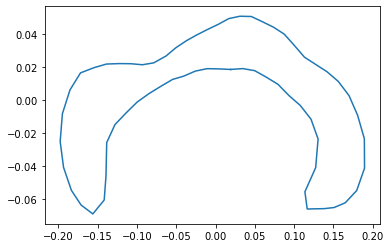

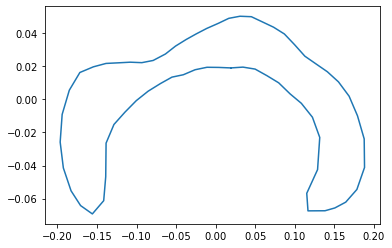

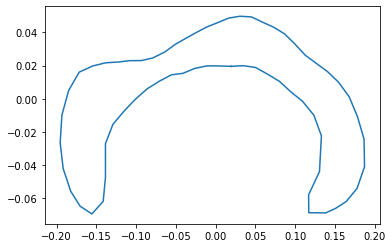

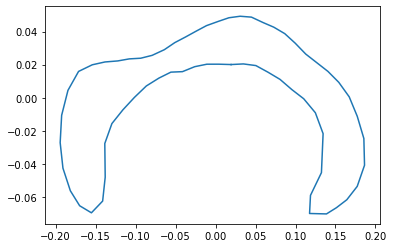

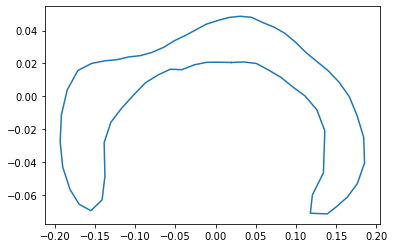

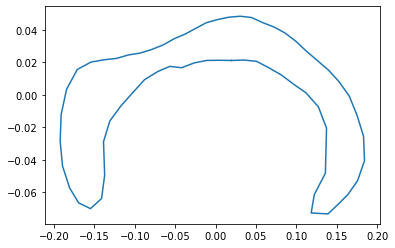

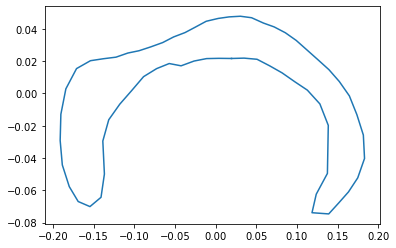

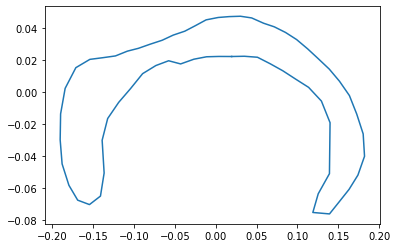

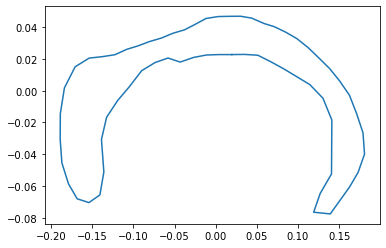

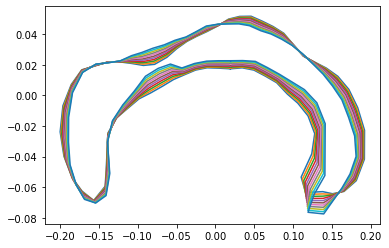

In [80]:
#Geodesic transformation for corpus
plotGeodesic(createTransform(corpus,10,30))

In [81]:
#Calculating Frechet mean using gradient decent
def meanCalc(dataSet):
    mu = dataSet[0]
    n = len(dataSet)
    for x in range(100):
        tangent = sum(list(map(lambda x: logMap(mu,x), dataSet)))/n
        if(np.linalg.norm(tangent) < 4e-16):
            break
        mu = expMap(mu, tangent)
    print(np.linalg.norm(tangent))
    return mu

In [82]:
print("Mean calc for Triangles")
mu_trian = meanCalc(triangles)

Mean calc for Triangles
3.4161604801609247e-16


In [83]:
print("Mean calc for Corpus")
mu_corpus = meanCalc(corpus)

Mean calc for Corpus
1.9030534611908348e-16


In [84]:
#Alligning triangle dataset and corpus dataset to the corresponding mean
triangles_aligned = list(map(lambda x: opa(x,mu_trian),triangles))
corpus_aligned = list(map(lambda x: opa(x, mu_corpus), corpus))

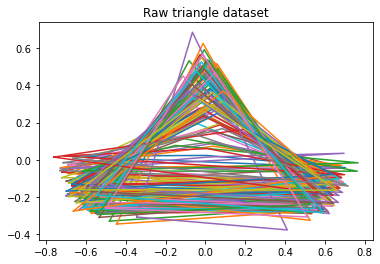

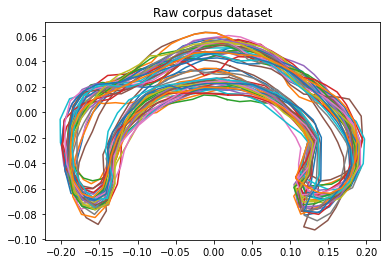

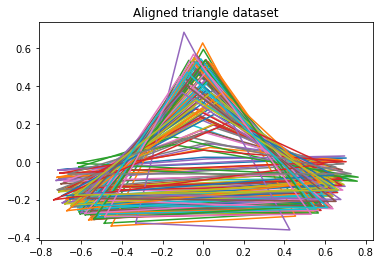

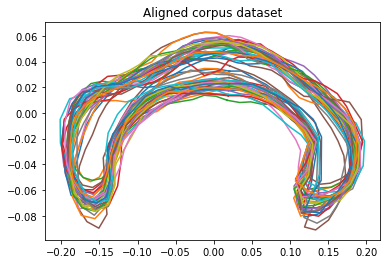

In [85]:
#Plotting raw triangle dataset
plt.figure()
plt.title("Raw triangle dataset")
for i in triangles:
    coord = list(i)
    coord.append(coord[0])
    xs, ys = zip(*coord)
    plt.plot(xs,ys)
plt.show()

#Plotting raw corpus dataset
plt.figure()
plt.title("Raw corpus dataset")
for i in corpus:
    coord = list(i)
    coord.append(coord[0])
    xs, ys = zip(*coord)
    plt.plot(xs,ys)
plt.show()

#Plotting aligned triangle dataset
plt.figure()
plt.title("Aligned triangle dataset")
for i in triangles_aligned:
    coord = list(i)
    coord.append(coord[0])
    xs, ys = zip(*coord)
    plt.plot(xs,ys)
plt.show()

#Plotting aligned corpus dataset
plt.figure()
plt.title("Aligned corpus dataset")
for i in corpus_aligned:
    coord = list(i)
    coord.append(coord[0])
    xs, ys = zip(*coord)
    plt.plot(xs,ys)
plt.show()


Triangles: When mean aligned the scatters of the raw data has been reduced.
Corpus: Much of a difference is unobservable

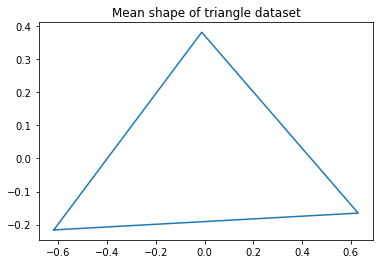

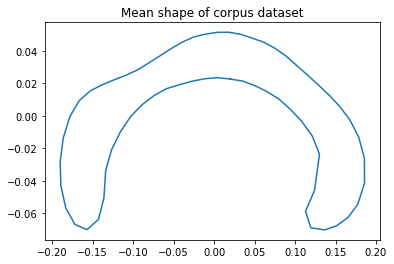

In [86]:
plt.figure()
plt.title("Mean shape of triangle dataset")
coord = list(mu_trian)
coord.append(coord[0])
xs, ys = zip(*coord)
plt.plot(xs,ys)
plt.show()

plt.figure()
plt.title("Mean shape of corpus dataset")
coord = list(mu_corpus)
coord.append(coord[0])
xs, ys = zip(*coord)
plt.plot(xs,ys)
plt.show()

In [87]:
#Function to calculate the eigen values and vectors when dataSet and mean is given
def pca(dataSet,mean):
    items = []
    for item in dataSet:
        x = logMap(mean,item)
        n = len(x)
        x = x.reshape(2*n,1)
        y = np.transpose(x)
        b = np.matmul(x,y)
        items.append(b)
    sam = sum(items)/(len(dataSet)-1)
    w,v = np.linalg.eigh(sam)
    return(w,v)


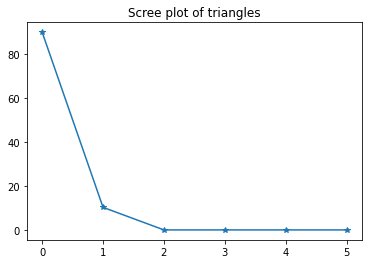

In [88]:

w,v = pca(triangles,mu_trian)
sum_w = sum(w)
percent = list(100*w/sum_w)
percent.sort(reverse =True)
plt.figure()
plt.title("Scree plot of triangles")
plt.plot(percent,'-*')
plt.show()
v1 = v[-1]
v2 = v[-2]
calc_trian = [(w[-1],v1.reshape(3,2)),(w[-2], v2.reshape(3,2))]

Sum of first and second eigen values exceed 98 percentile. So only two modes are enough to describe data.

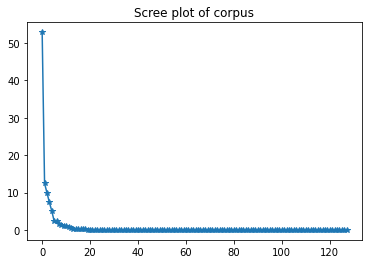

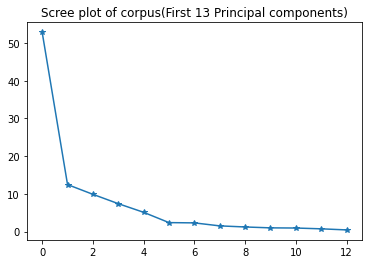

In [89]:
w,v = pca(corpus,mu_corpus)
sum_w = sum(w)
percent = list(100*w/sum_w)
percent.sort(reverse =True)
plt.figure()
plt.title("Scree plot of corpus")
plt.plot(percent,'-*')
plt.show()
plt.figure()
plt.title("Scree plot of corpus(First 13 Principal components)")
plt.plot(percent[0:13],'-*')
plt.show()
v1 = v[-1]
v2 = v[-2]
v3 = v[-3]
calc_corpus = [(w[-1],v1.reshape(64,2)),(w[-2], v2.reshape(64,2)), (w[-3],v3.reshape(64,2))  ]

In [91]:
sum(percent[0:13])

98.18791096634727

It takes up to 13 mode to achieve 98th percentile. There will take 13 modes to describe data.

In [92]:
b_st1 =  list(np.linspace(-1, 1, 10))
b_st2 =  list(np.linspace(-2, 2, 10))
sampling = [[0],b_st1, b_st2]

In [93]:

def modeOfVariation(label, alpha, mean, calc, mode):
    global sampling
    plt.figure()
    plt.title(label)
    for i in sampling[alpha]:
        coord = list(recheck(mean + i*(calc[mode][0]**0.5)*calc[mode][1]))
        coord.append(coord[0])
        xs, ys = zip(*coord)
        plt.plot(xs,ys)
    plt.show()
    return

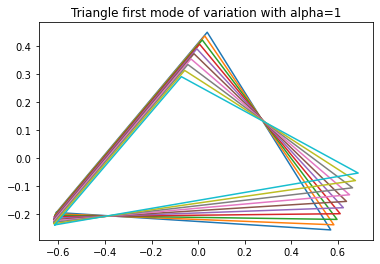

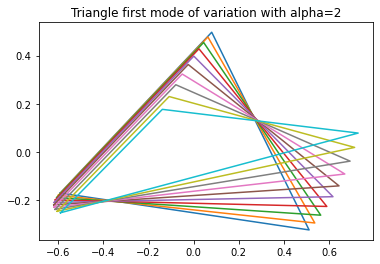

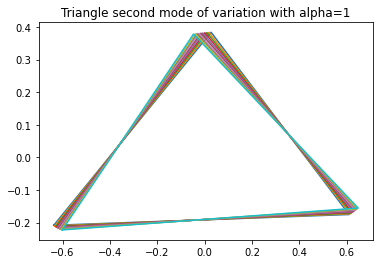

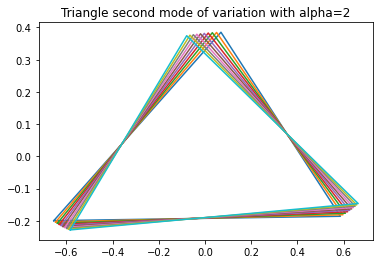

In [96]:
modeOfVariation("Triangle first mode of variation with alpha=1", 1, mu_trian, calc_trian, 0)
modeOfVariation("Triangle first mode of variation with alpha=2", 2, mu_trian, calc_trian, 0)
modeOfVariation("Triangle second mode of variation with alpha=1", 1, mu_trian, calc_trian, 1)
modeOfVariation("Triangle second mode of variation with alpha=2", 2, mu_trian, calc_trian, 1)

Before adding the gaussian noise triangles had one mode of variation (as only s changes) But after adding noise mode of variation is two which is of a generic triangle. But as expected one mode has a extremely higher impact than the other. It seems in both modes of variations an angle is kept constant and changes another. But that is more obvious in first mode of variation than the second one.

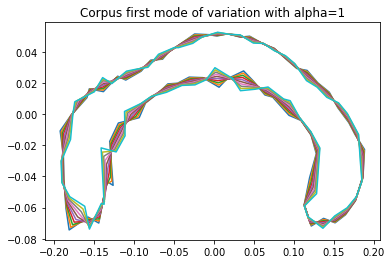

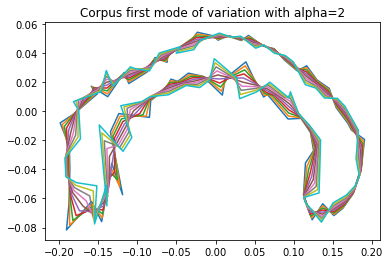

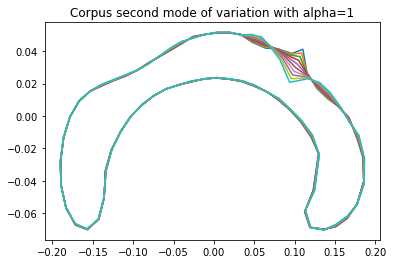

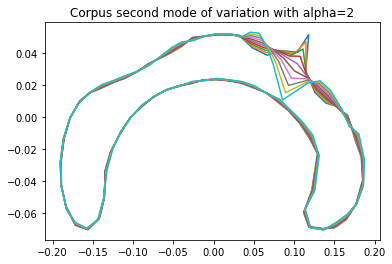

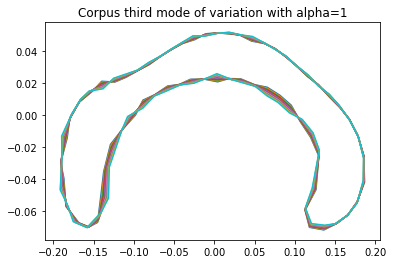

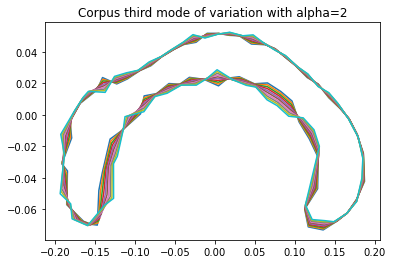

In [97]:
modeOfVariation("Corpus first mode of variation with alpha=1", 1, mu_corpus, calc_corpus, 0)
modeOfVariation("Corpus first mode of variation with alpha=2", 2, mu_corpus, calc_corpus, 0)
modeOfVariation("Corpus second mode of variation with alpha=1", 1, mu_corpus, calc_corpus, 1)
modeOfVariation("Corpus second mode of variation with alpha=2", 2, mu_corpus, calc_corpus, 1)
modeOfVariation("Corpus third mode of variation with alpha=1", 1, mu_corpus, calc_corpus, 2)
modeOfVariation("Corpus third mode of variation with alpha=2", 2, mu_corpus, calc_corpus, 2)

Primary modes of variation rigorously define the shape while lower the significance of the mode of variation is, it is more involved in tuning the shape rather than rigorously define the shape.

Discussion: Maximum number of modes have the notion of degree of freedom. This describe the maximum number of independent parameters to create a unique shape. For triangle that is two because only two angles are needed to determine the shape of a triangle.
For a shape with n points: A shape with n points can be divided in to n-2 independent triangles using its diagonals and edges. Ex: for quadrant 2 triangles, pentagon- 3, hexagon -4. As each of them have two modes of variations total modes of variation of a n point shape is 2(n-2)
Another way to approach shape with n points is, object with n points have 2n  modes of variations( considering x y cordinates) but for a shape we have to remove translation(2), scale(1), and rotation(1) which in total 4. Therefore for a shape with n points have 2(n-2) modes of variations.